In [2]:
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readxl))
library(ConsensusClusterPlus)
# library(pheatmap)
# suppressPackageStartupMessages(library(NMF))

In [3]:
moffitt <- read_excel("moffitt.xlsx")
dim(moffitt)
moffitt <- moffitt %>%
    filter(factor == 6)
dim(moffitt)
moffitt_genes <- moffitt$symbol
# moffitt_genes
head(moffitt,4)

[1] 19749    16

[1] 796  16

symbol,factor,F1_Liver,F2,F3_Exocrine,F4_CellCycle,F5_ActivatedStroma,F6_BasalLike,F7_Immune,F8_Classical,F9_Lung,F10,F11_Muscle,F12_Endocrine,F13_NormalStroma,F14
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCA12,6,0.0789,0.0000,0.0372,0.3240,0.0763,0.8533,0.0198,0.2290,0.0439,0.0000,0.1597,0.1430,0.0627,0.0772
ABCA4,6,0.3999,0.0403,0.0441,0.1991,0.0639,0.4691,0.2770,0.0215,0.1890,0.1474,0.2403,0.0000,0.4053,0.0000
ABCB9,6,0.1195,0.3608,0.1834,0.2503,0.0000,0.4221,0.1667,0.1611,0.1241,0.2575,0.2820,0.1730,0.0561,0.2962
ABHD12B,6,0.0055,0.0419,0.0587,0.1973,0.0000,0.2283,0.0335,0.0000,0.2229,0.0065,0.0574,0.0413,0.0694,0.0000


In [4]:
collisson <- readLines("collisson.list")
collisson

[1] "AGR2"       "AHNAK2"     "AIM2"       "ATP10B"     "CAPN8"     
 [6] "CAV1"       "CEACAM5"    "CEACAM6"    "CEL"        "CELA2B"    
[11] "CELA3A"     "CELA3B"     "CFTR"       "CKS2"       "CLPS"      
[16] "CPB1"       "CTRB2"      "ELF3"       "ERBB3"      "FAM26F"    
[21] "FERMT1"     "FOXQ1"      "FXYD3"      "GP2"        "GPM6B"     
[26] "GPRC5A"     "GPX2"       "HK2"        "HMMR"       "KRT14"     
[31] "LGALS4"     "LOX"        "MUC13"      "NT5E"       "PAPPA"     
[36] "PHLDA1"     "PLA2G1B"    "PLS1"       "PMAIP1"     "PNLIP"     
[41] "PNLIPRP2"   "PRSS1"      "PRSS2"      "REG1A"      "REG1B"     
[46] "REG3A"      "S100A2"     "S100P"      "SDR16C5"    "SLC16A1"   
[51] "SLC2A3"     "SLC3A1"     "SLC4A4"     "SLC5A3"     "SPINK1"    
[56] "ST6GALNAC1" "TFF1"       "TFF3"       "TMEM45B"    "TOX3"      
[61] "TSPAN8"     "TWIST1"

In [5]:
tumor_rna <- read.table("../data_linkedomics/mRNA_RSEM_UQ_log2_Tumor.cct", sep="\t", header=T, row.names = 1)
head(tumor_rna)
dim(tumor_rna)

,C3L.03394,C3N.03428,C3L.02112,C3N.01719,C3N.03670,C3N.02998,C3N.03211,C3L.01052,C3N.00512,C3N.02295,⋯,C3L.01031,C3N.01167,C3L.01971,C3L.02604,C3L.00277,C3L.01328,C3L.03639,C3N.04282,C3L.04072,C3L.02613
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6.692021,6.355394,7.369336,5.837855,6.273016,5.830226,6.233734,7.733062,6.940000,6.912359,⋯,6.653944,6.335488,6.692975,5.4877236,5.832438,5.165238,4.696418,6.159660,4.631532,5.574783
A1BG-AS1,7.525181,6.976172,6.951589,6.389844,6.824514,6.014028,5.901466,7.079053,6.497582,6.951346,⋯,6.434122,5.755125,6.358555,5.4423845,4.163636,4.850363,4.589423,6.123135,5.181857,5.145694
A1CF,10.042247,6.944645,8.976580,7.296482,9.392307,6.171279,9.314027,9.781720,8.428144,9.562943,⋯,8.006891,10.655383,9.309662,6.3526344,6.229405,6.955306,6.316519,5.874011,5.239291,5.494695
A2M,15.906459,14.685723,15.515414,15.727089,15.681951,15.336633,16.288986,15.810445,15.976326,15.975039,⋯,14.254752,14.800383,15.445033,13.9939189,14.378005,15.122700,13.721873,14.685338,14.399627,13.649681
A2M-AS1,9.210500,9.168838,8.150627,8.728630,8.546683,9.353477,8.343518,8.071802,8.391297,8.789384,⋯,7.287581,6.889905,7.124159,5.8865595,6.413674,6.579675,5.093670,6.592302,5.301245,5.533477
A2ML1,2.798104,1.610876,3.847147,5.575832,6.709705,2.798944,6.983397,5.295422,8.447647,5.301915,⋯,4.027510,3.369260,4.478297,0.9761578,6.174211,7.847612,1.583606,9.586487,11.740159,8.013939


[1] 28057   140

In [6]:
tumor_filtered <- tumor_rna[(rowMeans(tumor_rna==0) <= 0.5) & (rownames(tumor_rna) %in% collisson),]
head(tumor_filtered,5)
z_mat <- t(scale(t(as.matrix(tumor_filtered))))
head(z_mat)

,C3L.03394,C3N.03428,C3L.02112,C3N.01719,C3N.03670,C3N.02998,C3N.03211,C3L.01052,C3N.00512,C3N.02295,⋯,C3L.01031,C3N.01167,C3L.01971,C3L.02604,C3L.00277,C3L.01328,C3L.03639,C3N.04282,C3L.04072,C3L.02613
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AGR2,11.522252,13.62179,13.12580,10.898683,11.755570,13.154302,14.219161,10.681097,12.331547,11.877080,⋯,14.303488,14.419469,14.154284,13.110241,14.079676,11.375527,14.645669,13.239233,12.570027,13.845657
AHNAK2,12.082180,13.61151,13.09613,13.156067,13.839983,12.548192,14.314846,13.314780,13.556330,13.474832,⋯,14.187977,11.689907,12.890600,14.884419,15.219040,15.748313,15.912229,15.428948,14.823874,14.658334
AIM2,8.882594,10.08358,6.61339,7.883937,6.501148,8.482304,6.392462,6.627249,7.404205,7.841398,⋯,7.759059,7.019435,6.631992,8.901525,6.247339,6.108611,9.728071,8.439384,7.683318,11.185007
ATP10B,9.454060,10.00399,11.47104,8.479340,11.544482,10.825449,8.987968,9.323703,10.390777,12.380505,⋯,11.783611,12.061766,10.190204,12.687298,10.226628,5.712187,8.085833,5.177253,9.232150,6.846673
CAPN8,10.301221,10.48995,10.55450,10.013444,10.207464,11.584490,12.282372,9.359784,11.791114,9.331029,⋯,12.368392,11.347951,10.447184,11.497262,13.257195,7.552417,10.424658,8.769038,10.866259,10.869930


,C3L.03394,C3N.03428,C3L.02112,C3N.01719,C3N.03670,C3N.02998,C3N.03211,C3L.01052,C3N.00512,C3N.02295,⋯,C3L.01031,C3N.01167,C3L.01971,C3L.02604,C3L.00277,C3L.01328,C3L.03639,C3N.04282,C3L.04072,C3L.02613
AGR2,-0.94699964,0.4619669,0.1291173,-1.3654671,-0.79042351,0.1482445,0.86285453,-1.5114855,-0.40389387,-0.7088800,⋯,0.9194449,0.9972785,0.8193165,0.1186754,0.7692485,-1.0454646,1.1490777,0.205240,-0.2438536,0.6122019
AHNAK2,-2.07074325,-0.4855428,-1.0197520,-0.9576270,-0.24872703,-1.5877080,0.24348267,-0.7931164,-0.54274206,-0.6272175,⋯,0.1119793,-2.4773464,-1.2327914,0.8338632,1.1807075,1.7293154,1.8992193,1.398284,0.7711059,0.5995194
AIM2,1.56541605,2.4715173,-0.1466231,0.8119622,-0.23130561,1.2634102,-0.31330550,-0.1361667,0.45002060,0.7798678,⋯,0.7177461,0.1597248,-0.1325885,1.5796988,-0.4227967,-0.5274623,2.2033000,1.231028,0.6606018,3.3025095
ATP10B,-0.60123632,-0.2738576,0.5994816,-1.1814927,0.64320485,0.2151598,-0.87870345,-0.6788384,-0.04360312,1.1408942,⋯,0.7855600,0.9511473,-0.1630052,1.3235300,-0.1413217,-2.8287958,-1.4157503,-3.147245,-0.7333404,-2.1534296
CAPN8,-0.59994843,-0.4591061,-0.4109329,-0.8147064,-0.66991642,0.3577109,0.87851699,-1.3025104,0.51190763,-1.3239695,⋯,0.9427102,0.1811903,-0.4910212,0.2926157,1.6059934,-2.6512864,-0.5078317,-1.743364,-0.1782798,-0.1755403
CAV1,0.05640767,-0.5109259,-1.3081555,1.3013985,-0.09905445,0.8255927,-0.08577963,-0.9061329,-0.18927425,-0.3660872,⋯,-0.8031301,-1.7310709,-0.1283245,-1.5876659,0.0318786,1.8693548,1.6573878,2.394045,1.6106611,1.4591361


end fraction

clustered



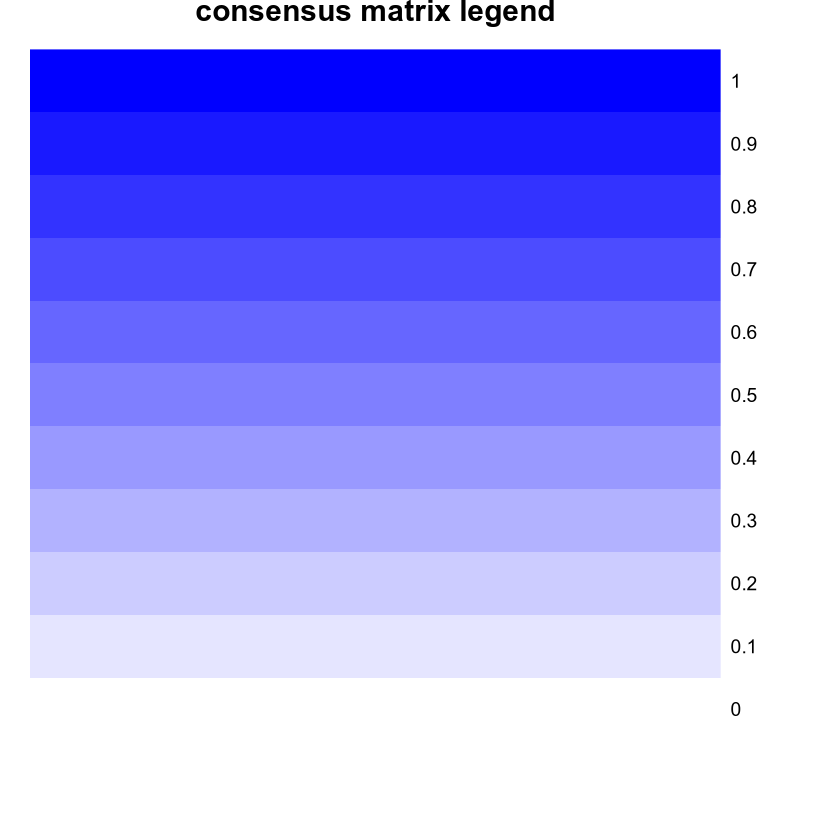

clustered



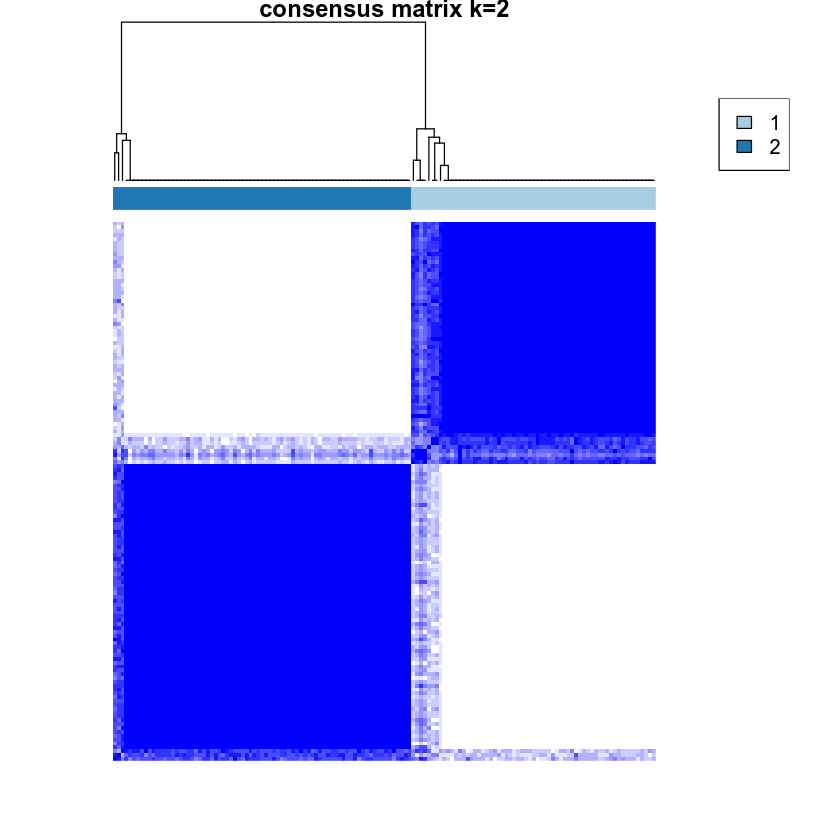

clustered



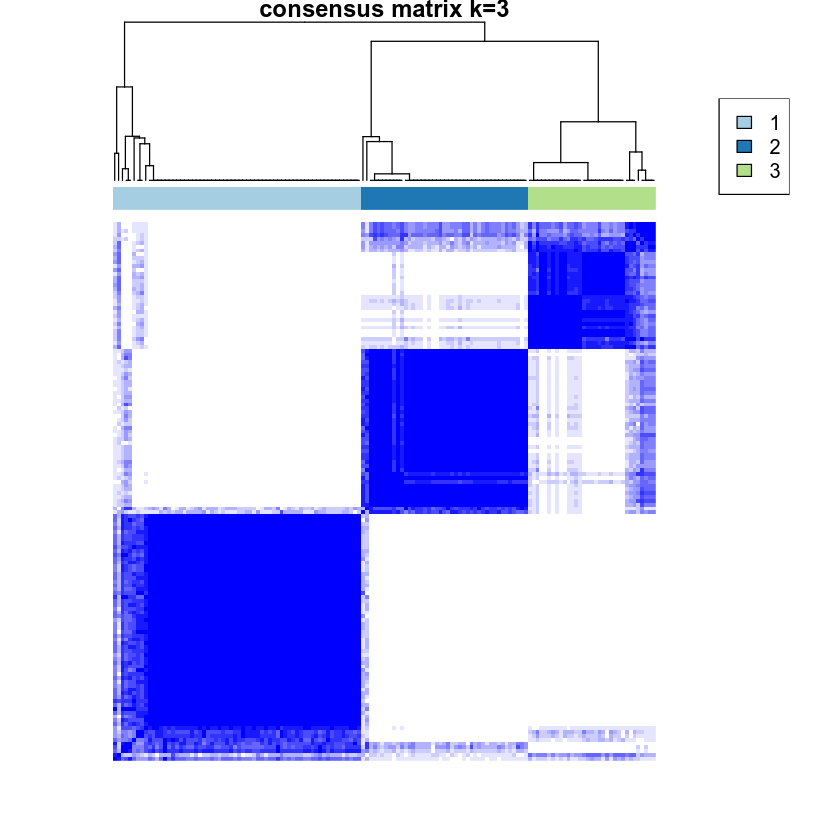

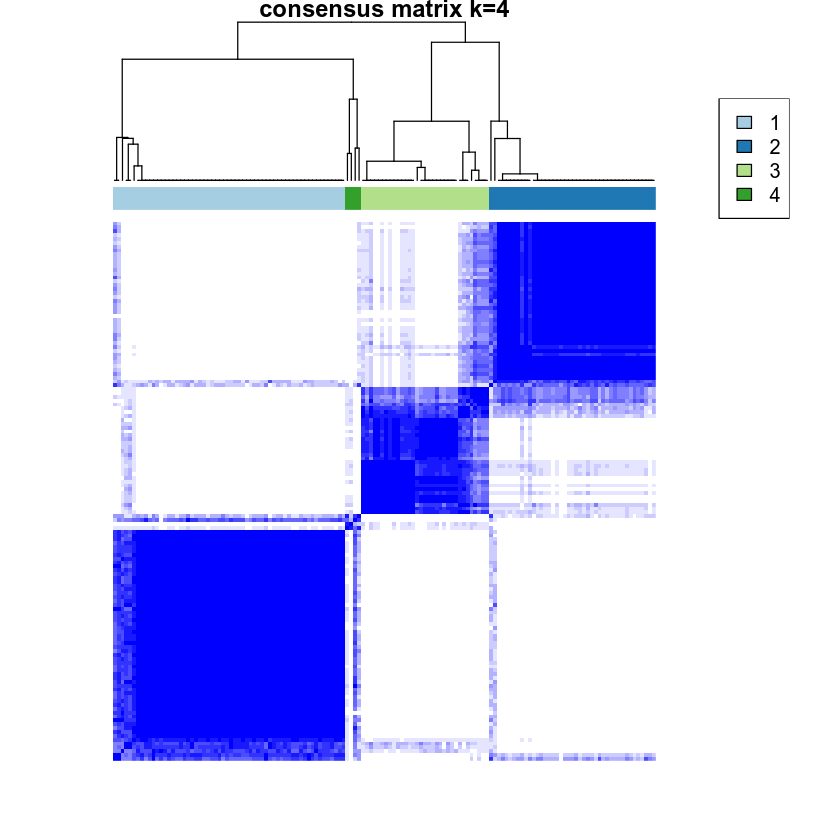

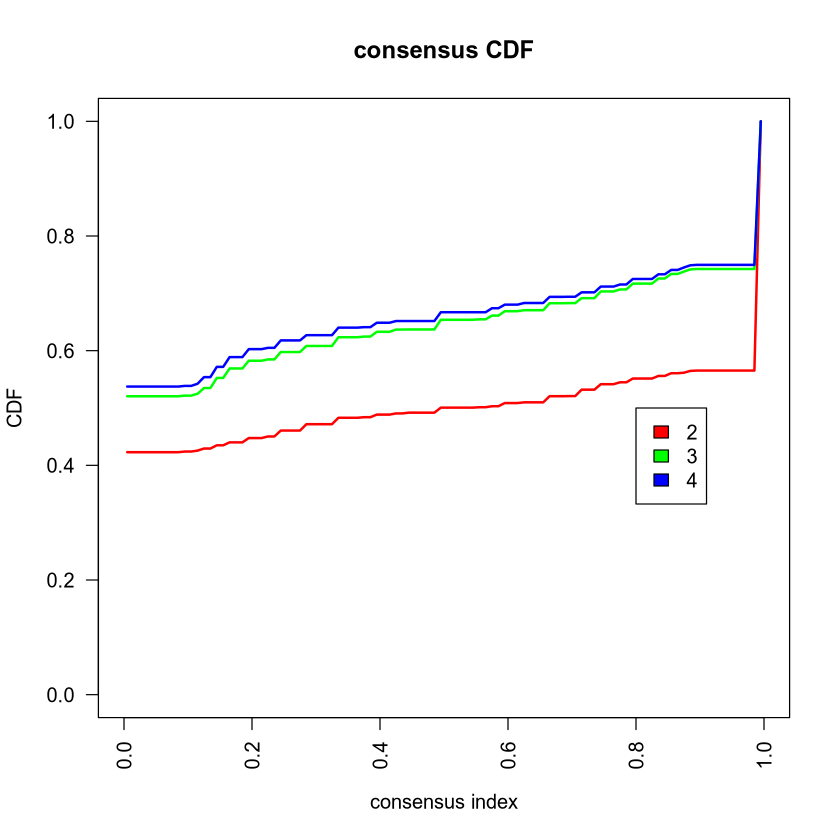

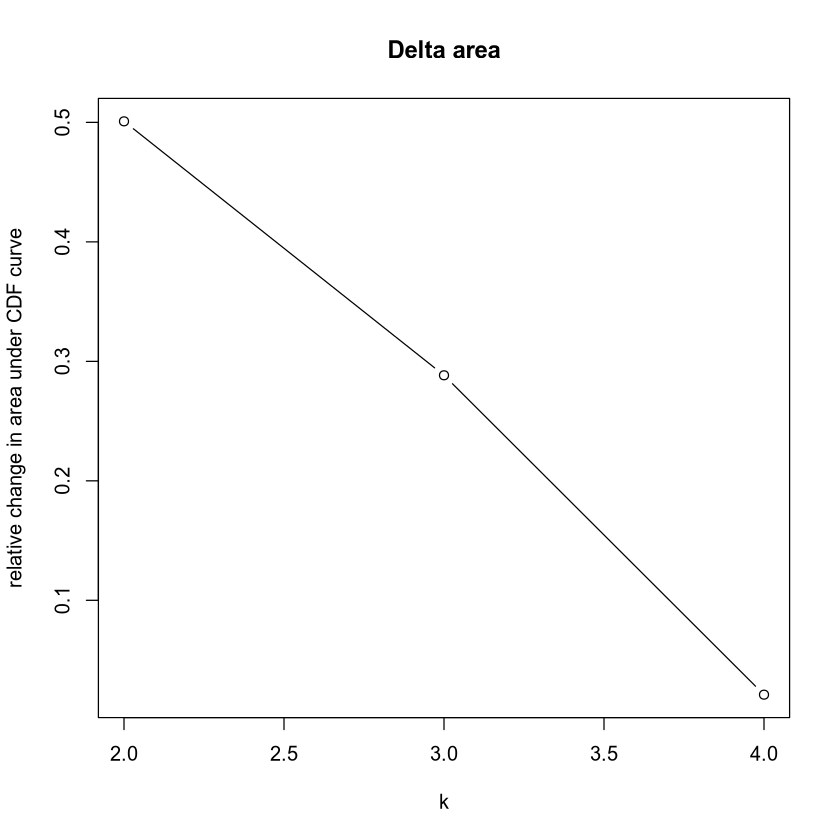

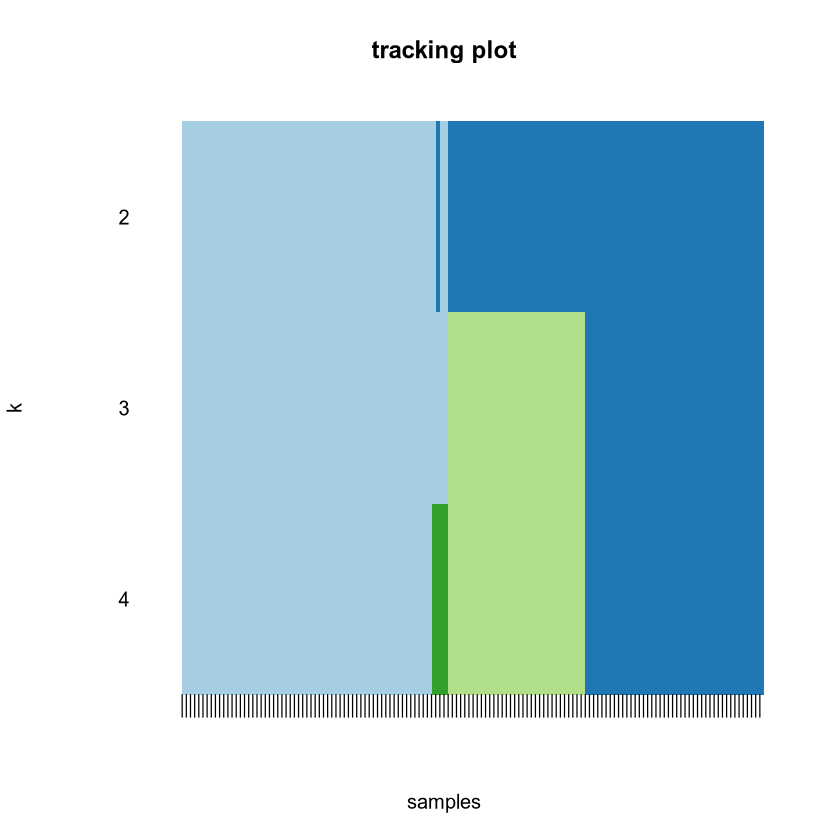

In [7]:
results <- ConsensusClusterPlus(
  z_mat,
  maxK = 4,                   # Try 2 to 6 clusters
#   reps = 1000,                # Number of resamplings
#   pItem = 0.8,                # Proportion of samples to resample
#   pFeature = 1.0,             # Proportion of features
  clusterAlg = "hc",          # Clustering algorithm ("hc", "km", etc.)
  distance = "pearson",       # Distance metric
  seed = 123,                 # For reproducibility
#   plot = "png",               # Output plots as PNGs in working dir
#   title = "consensus_clustering_output"
)
clusters <- results[[3]]$consensusClass

In [10]:
cluster_df <- data.frame(sample = names(clusters),  cluster = as.factor(clusters))

z_df <- as.data.frame(t(z_mat))
z_df$sample <- rownames(z_df)

z_with_cluster <- merge(z_df, cluster_df, by = "sample")


mean_expr <- z_with_cluster %>%
  group_by(cluster) %>%
  summarise(across(-sample, mean))

cluster_labels <- c("1" = "exocrine-like", "2" = "classical", "3" = "quasimesenchymal")
cluster_df$subtype <- cluster_labels[as.character(cluster_df$cluster)]
cluster_df$sample <- gsub("\\.", "-", cluster_df$sample)
write.table(cluster_df, "rna_subtyping_collisson.tsv", sep="\t", quote=F, row.names=F)
cluster_df

,sample,cluster,subtype
,<chr>,<fct>,<chr>
C3L.03394,C3L-03394,1,exocrine-like
C3N.03428,C3N-03428,2,classical
C3L.02112,C3L-02112,1,exocrine-like
C3N.01719,C3N-01719,3,quasimesenchymal
C3N.03670,C3N-03670,1,exocrine-like
C3N.02998,C3N-02998,2,classical
C3N.03211,C3N-03211,1,exocrine-like
C3L.01052,C3L-01052,1,exocrine-like
C3N.00512,C3N-00512,1,exocrine-like


In [9]:
pheatmap(as.matrix(mean_expr[,-1]), cluster_cols = FALSE)

ERROR: Error in pheatmap(as.matrix(mean_expr[, -1]), cluster_cols = FALSE): could not find function "pheatmap"


In [ ]:
z_df <- as.data.frame(t(z_mat))
z_df$sample <- rownames(z_df)
z_df

,AGR2,AHNAK2,AIM2,ATP10B,CAPN8,CAV1,CEACAM5,CEACAM6,CEL,CELA2B,⋯,SLC5A3,SPINK1,ST6GALNAC1,TFF1,TFF3,TMEM45B,TOX3,TSPAN8,TWIST1,sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C3L.03394,-0.94699964,-2.07074325,1.56541605,-0.601236324,-0.59994843,0.05640767,0.42122141,-0.29932168,0.4649050,0.4621270,⋯,-0.87555852,-0.844549589,-0.404164448,-0.07355999,0.49169095,-0.89643912,-0.47385029,-1.126040655,-0.46321091,C3L.03394
C3N.03428,0.46196685,-0.48554281,2.47151727,-0.273857600,-0.45910615,-0.51092593,0.41439319,0.26186940,-1.6473557,-1.1938416,⋯,0.38977071,-0.245255274,0.005383195,0.50096132,-0.03109051,0.11098288,-0.52923469,0.265070976,-0.35625110,C3N.03428
C3L.02112,0.12911728,-1.01975203,-0.14662312,0.599481628,-0.41093289,-1.30815550,0.64246473,0.29718332,1.0841114,1.2393707,⋯,-1.37814553,0.584774863,0.213061332,0.75005373,0.53473417,0.26446082,-0.44444373,0.001375663,-1.09602341,C3L.02112
C3N.01719,-1.36546712,-0.95762699,0.81196221,-1.181492664,-0.81470641,1.30139852,0.35552440,-0.37261449,-1.3776485,-1.1240853,⋯,0.64560738,-1.702856360,-1.909238142,-0.49086530,-0.61616055,-0.25395942,-1.09505464,-1.084545687,1.48183959,C3N.01719
C3N.03670,-0.79042351,-0.24872703,-0.23130561,0.643204847,-0.66991642,-0.09905445,0.94317887,0.64648945,1.1721815,1.2117815,⋯,-0.35959669,0.621607069,0.440460597,0.39764297,0.88594461,0.36694156,-0.14593153,0.023376197,-0.16429455,C3N.03670
C3N.02998,0.14824447,-1.58770795,1.26341023,0.215159828,0.35771094,0.82559271,-1.74968643,-0.53956165,-1.2456046,-1.0103597,⋯,0.18134286,0.044253118,-0.221634121,-0.49343702,-1.04873091,-0.14461163,-0.33816151,1.165887038,-0.05516160,C3N.02998
C3N.03211,0.86285453,0.24348267,-0.31330550,-0.878703452,0.87851699,-0.08577963,0.09933764,-0.88395898,0.3905931,0.2756942,⋯,-0.37376615,0.548431177,0.574679318,0.61007300,-0.50465844,-0.96959860,0.72491274,1.406481867,-1.31235238,C3N.03211
C3L.01052,-1.51148554,-0.79311638,-0.13616666,-0.678838447,-1.30251039,-0.90613286,0.22889404,-0.14110294,1.3716072,1.6581666,⋯,-1.28573489,1.255831615,-1.077111630,-0.56452891,-0.19638544,-0.74355012,-0.10326717,-0.126718548,-0.64091975,C3L.01052
C3N.00512,-0.40389387,-0.54274206,0.45002060,-0.043603116,0.51190763,-0.18927425,0.37926785,0.30907057,1.1733937,1.1029780,⋯,-0.66762567,0.801322929,0.565242867,0.39138418,0.21515704,-0.31633148,0.04839634,0.004422708,0.08629762,C3N.00512
